In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# variables
epochs = 50
batch_size = 128
verbose = 1
output_class = 10
validation_split = 0.2




In [2]:
# mnist 데이터를 로드한다
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 입력을 0~1 사이로 전처리 수행
X_train /= 255
X_test /= 255

# 레이블을 원핫 인코딩
Y_train = tf.keras.utils.to_categorical(Y_train, output_class)
Y_test = tf.keras.utils.to_categorical(Y_test, output_class)


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
Y_test.shape

(10000, 10)

In [5]:
type(X_train)

numpy.ndarray

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

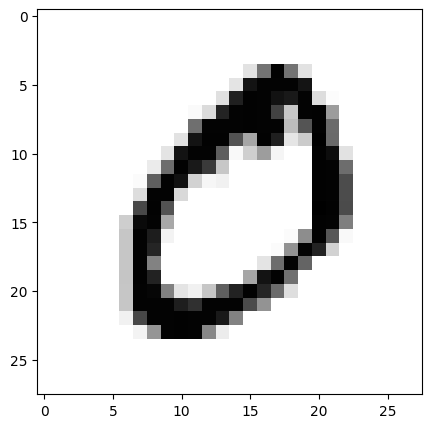

In [8]:
plt.figure(figsize=(5,5))
image = np.reshape(X_train[1], [28,28])
plt.imshow(image, cmap='Greys')
plt.show()

In [9]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:

# models
model = tf.keras.models.Sequential()
model = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(128, activation='relu'),
                           keras.layers.Dense(10, activation='softmax') ])
# model 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
# model compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#model 학습
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_split=validation_split)

Epoch 1/50
375/375 [==============================] - 7s 16ms/step - loss: 0.4030 - accuracy: 0.8900 - val_loss: 0.2133 - val_accuracy: 0.9417
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: 0.1898 - accuracy: 0.9464 - val_loss: 0.1612 - val_accuracy: 0.9556
Epoch 3/50
375/375 [==============================] - 3s 9ms/step - loss: 0.1366 - accuracy: 0.9609 - val_loss: 0.1299 - val_accuracy: 0.9638
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1072 - accuracy: 0.9695 - val_loss: 0.1177 - val_accuracy: 0.9653
Epoch 5/50
375/375 [==============================] - 3s 9ms/step - loss: 0.0865 - accuracy: 0.9752 - val_loss: 0.1030 - val_accuracy: 0.9701
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0711 - accuracy: 0.9799 - val_loss: 0.0952 - val_accuracy: 0.9724
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0601 - accuracy: 0.9833 - val_loss: 0.0926 - val_accuracy: 0.9727
Epoc

In [13]:
#모델 평가
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy: ', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.1106 - accuracy: 0.9795
Test accuracy:  0.9794999957084656
